# Mandelbrot Set (Heat Map)

In [3]:
import numpy as np
import matplotlib as plt

def mandelbrot(level, res):
    
    x_cor = np.linspace(-2, 1, res)
    y_cor = np.linspace(-1.5, 1.5, res)
    output = np.zeros((res, res))
    
    for i in range(res):
        for j in range(res):
            c = complex(x_cor[i], y_cor[j])
            z = complex(0, 0)
            count = 0
            for k in range(level):
                z = z**2 + c
                count += 1
                if abs(z) > 4:
                    break
            output[i, j] = count
    return output   

def plot_mandelbrot(x):
    res = 1000
    level = int(x)
    
    output = mandelbrot(level, res)
    
    plt.figure(figsize=(10,10))
    plt.imshow(output.T, cmap="hot")
    plt.axis("off")
    plt.show()

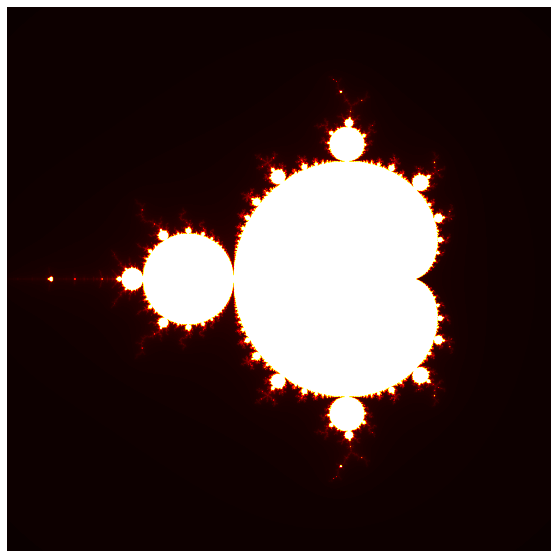

In [48]:
plot_mandelbrot(250)

# Julia Fractal (Heat Map)

In [15]:
import numpy as np
import matplotlib as plt

def julia(cx, cy, level, res):
    # Initialising data
    x_cor = np.linspace(-2, 2, res)
    y_cor = np.linspace(-2, 2, res)
    output = np.zeros((res, res))
    c = complex(cx, cy)
    
    # Iterating
    for i in range(res):
        for j in range(res):
            z = complex(x_cor[i], y_cor[j])
            count = 0
            for k in range(level):
                z = z**2 + c
                count += 1
                if abs(z) > 4:
                    break
            output[i, j] = count
    return output

def plot_julia(cx, cy, x):
    res = 1000
    level = int(x)
    
    output = julia(cx, cy, level, res)
    
    plt.figure(figsize=(10,10))
    plt.imshow(output.T, cmap="hot")
    plt.axis("off")
    plt.show()

In [16]:
plot_julia(0.355, 0.355, 250)

AttributeError: module 'matplotlib' has no attribute 'figure'

# Kock Snowflake (Turtle)

https://towardsdatascience.com/creating-fractals-with-python-d2b663786da6

In [2]:
import turtle as tr

def koch_curve(level, length):
    
    if level == 0:
        tr.forward(length)
        return
    else:
        koch_curve(level - 1, length / 3)
        tr.left(60)
        koch_curve(level -1, length / 3)
        tr.right(120)
        koch_curve(level -1, length / 3)
        tr.left(60)
        koch_curve(level -1, length / 3)

def koch_snowflake(level, length):
    col = ["red", "green", "blue", "yellow"]
    tr.begin_fill()
    for i in range(3):
        tr.color(col[i])
        koch_curve(level, length)
        tr.left(-120)

def draw_koch_snowflake(x):
    tr.speed(speed=0)
    level = int(x)
    length = 500
    tr.penup()
    tr.goto(- length / 2, length / 2)
    
    tr.pendown()
    koch_snowflake(level, length)
    tr.done()

In [4]:
draw_koch_snowflake(5)

Terminator: 

# Sierpinksi Triangle (Turtle)

https://stackoverflow.com/questions/25772750/sierpinski-triangle-recursion-using-turtle-graphics

In [1]:
import turtle as tr

def sierpinksi(level, length):

    if level == 0: # stop conditions
        tr.begin_fill()
        tr.color("black")
        for i in range(3):
            tr.forward(length)
            tr.left(120)
        tr.end_fill()

    else:
        sierpinksi(level - 1, length / 2)
        tr.forward(length / 2)
        
        sierpinksi(level - 1, length / 2)
        tr.backward(length / 2)
        
        tr.left(60)
        tr.forward(length / 2)
        tr.right(60)
        
        sierpinksi(level - 1, length / 2)
        tr.left(60)
        tr.backward(length / 2)
        tr.right(60)

def draw_sierpinksi(x):
    tr.speed(speed=0)
    level = int(x)
    length = 500
    tr.penup()
    tr.goto(- length / 2, - length / 2)
    
    tr.pendown()
    sierpinksi(level, length)
    tr.done()

In [2]:
draw_sierpinksi(4)

# Peano Curve (Turtle)

https://stackoverflow.com/questions/60210993/how-should-i-draw-a-peano-curve

In [5]:
import turtle as tr

def peano(level, length):
    if level == 0:
        tr.forward(length)
    else:
        angle = 90

        peano(level-1, length/3)

        tr.right(angle)
        peano(level-1, length/3)

        for _ in range(2):
            for _ in range(3):
                tr.left(angle)
                peano(level-1, length/3)

            angle = -angle

        tr.left(angle)
        peano(level-1, length/3)
        
def draw_peano(x):
    tr.speed(speed=0)
    level = int(x)
    length = 400
    tr.penup()
    tr.goto(- length / 2, length / 2)
    
    tr.pendown()
    tr.right(45)
    peano(level, length)
    tr.done()

In [19]:
draw_peano(5)

Terminator: 

# Hilbert Curve (Turtle)

https://www.geeksforgeeks.org/python-hilbert-curve-using-turtle/#:~:text=Turtle%20graphics%20are%20provided%20in,certain%20step%20size%20distance%20apart.

In [20]:
import turtle as tr

def hilbert(level, angle, length, i): 
    
    size = 225
    pos = tr.position()
    g = abs(pos[0] / size)
    b = abs(pos[1] / size)
    tr.color(0.8, g, b)
    # Input Parameters are numeric 
    # Return Value: None 
    if level == 0: 
        return
    
    tr.right(angle) 
    hilbert(level-1, -angle, length, i) 

    tr.forward(length) 
    tr.left(angle) 
    hilbert(level-1, angle, length, i) 

    tr.forward(length) 
    hilbert(level-1, angle, length, i) 

    tr.left(angle) 
    tr.forward(length) 
    hilbert(level-1, -angle, length, i) 
    tr.right(angle) 

def draw_hilbert(x): 
    tr.speed(speed=0)
    level = int(x) 
    size = 400
    tr.penup() 
    tr.goto(-size / 2.0, size / 2.0) 
    tr.pensize(3)
    tr.pendown() 

    # For positioning turtle 
    hilbert(level, 90, size/(2**level-1), -1) 
    tr.done() 

In [ ]:
draw_hilbert(5)